In [1]:
! pip install pandas

In [16]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 8.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 12.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("db_data/yellow_tripdata_2020-01.csv", low_memory=False)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_') 
df.columns = df.columns.str.replace('id', '_id') 

Столбец группировки

In [6]:
df.tpep_pickup_datetime = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df.tpep_dropoff_datetime = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [7]:
df['date'] = df['tpep_pickup_datetime'].dt.to_period("D")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendor_id              float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   ratecode_id            float64       
 6   store_and_fwd_flag     object        
 7   pulocation_id          int64         
 8   dolocation_id          int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  date                  

In [14]:
df.passenger_count

array([ 1.,  4.,  2.,  3.,  6.,  5.,  0.,  8.,  7.,  9., nan])

Посмотрим зависимости между переменными

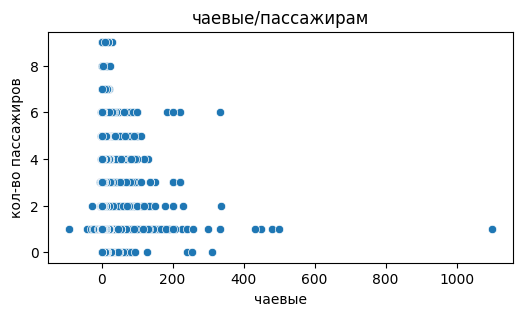

In [9]:
f, ax = plt.subplots(figsize=(6, 3))
sns.scatterplot(x="tip_amount", y="passenger_count", data=df)
ax.set(xlabel='чаевые', ylabel='кол-во пассажиров')
plt.title("чаевые/пассажирам")
plt.show()

In [10]:
df =df[df.trip_distance<1000]

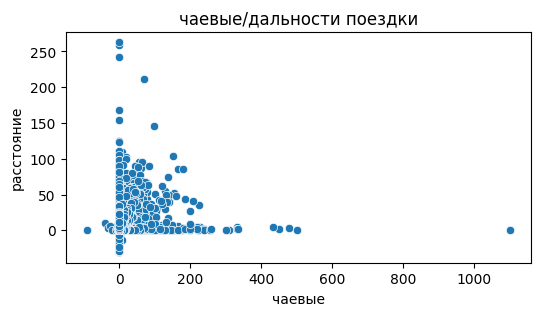

In [11]:
f, ax = plt.subplots(figsize=(6, 3))
sns.scatterplot(x="tip_amount", y="trip_distance", data=df)
ax.set(xlabel='чаевые', ylabel='расстояние')
plt.title("чаевые/дальность поездки")
plt.show()

Вывод: по графикам видно что в данном масштабе и с выбросами они не наглядные 

## на следующем графике пытаюсь детальнее познакомиться с распределением чаевых

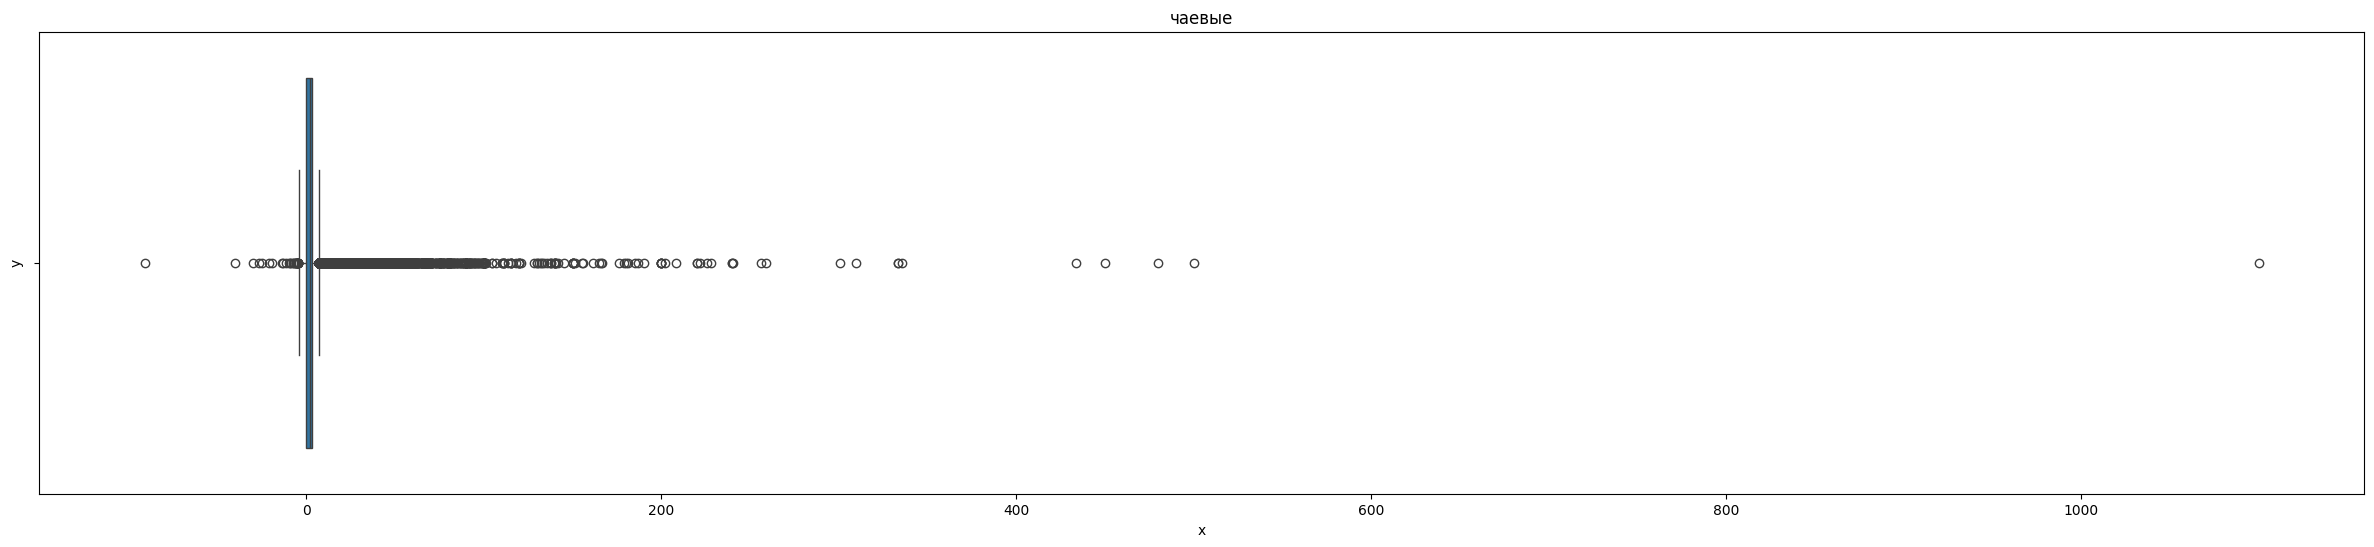

In [12]:
f, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(x=df.tip_amount)
ax.set_title("чаевые")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

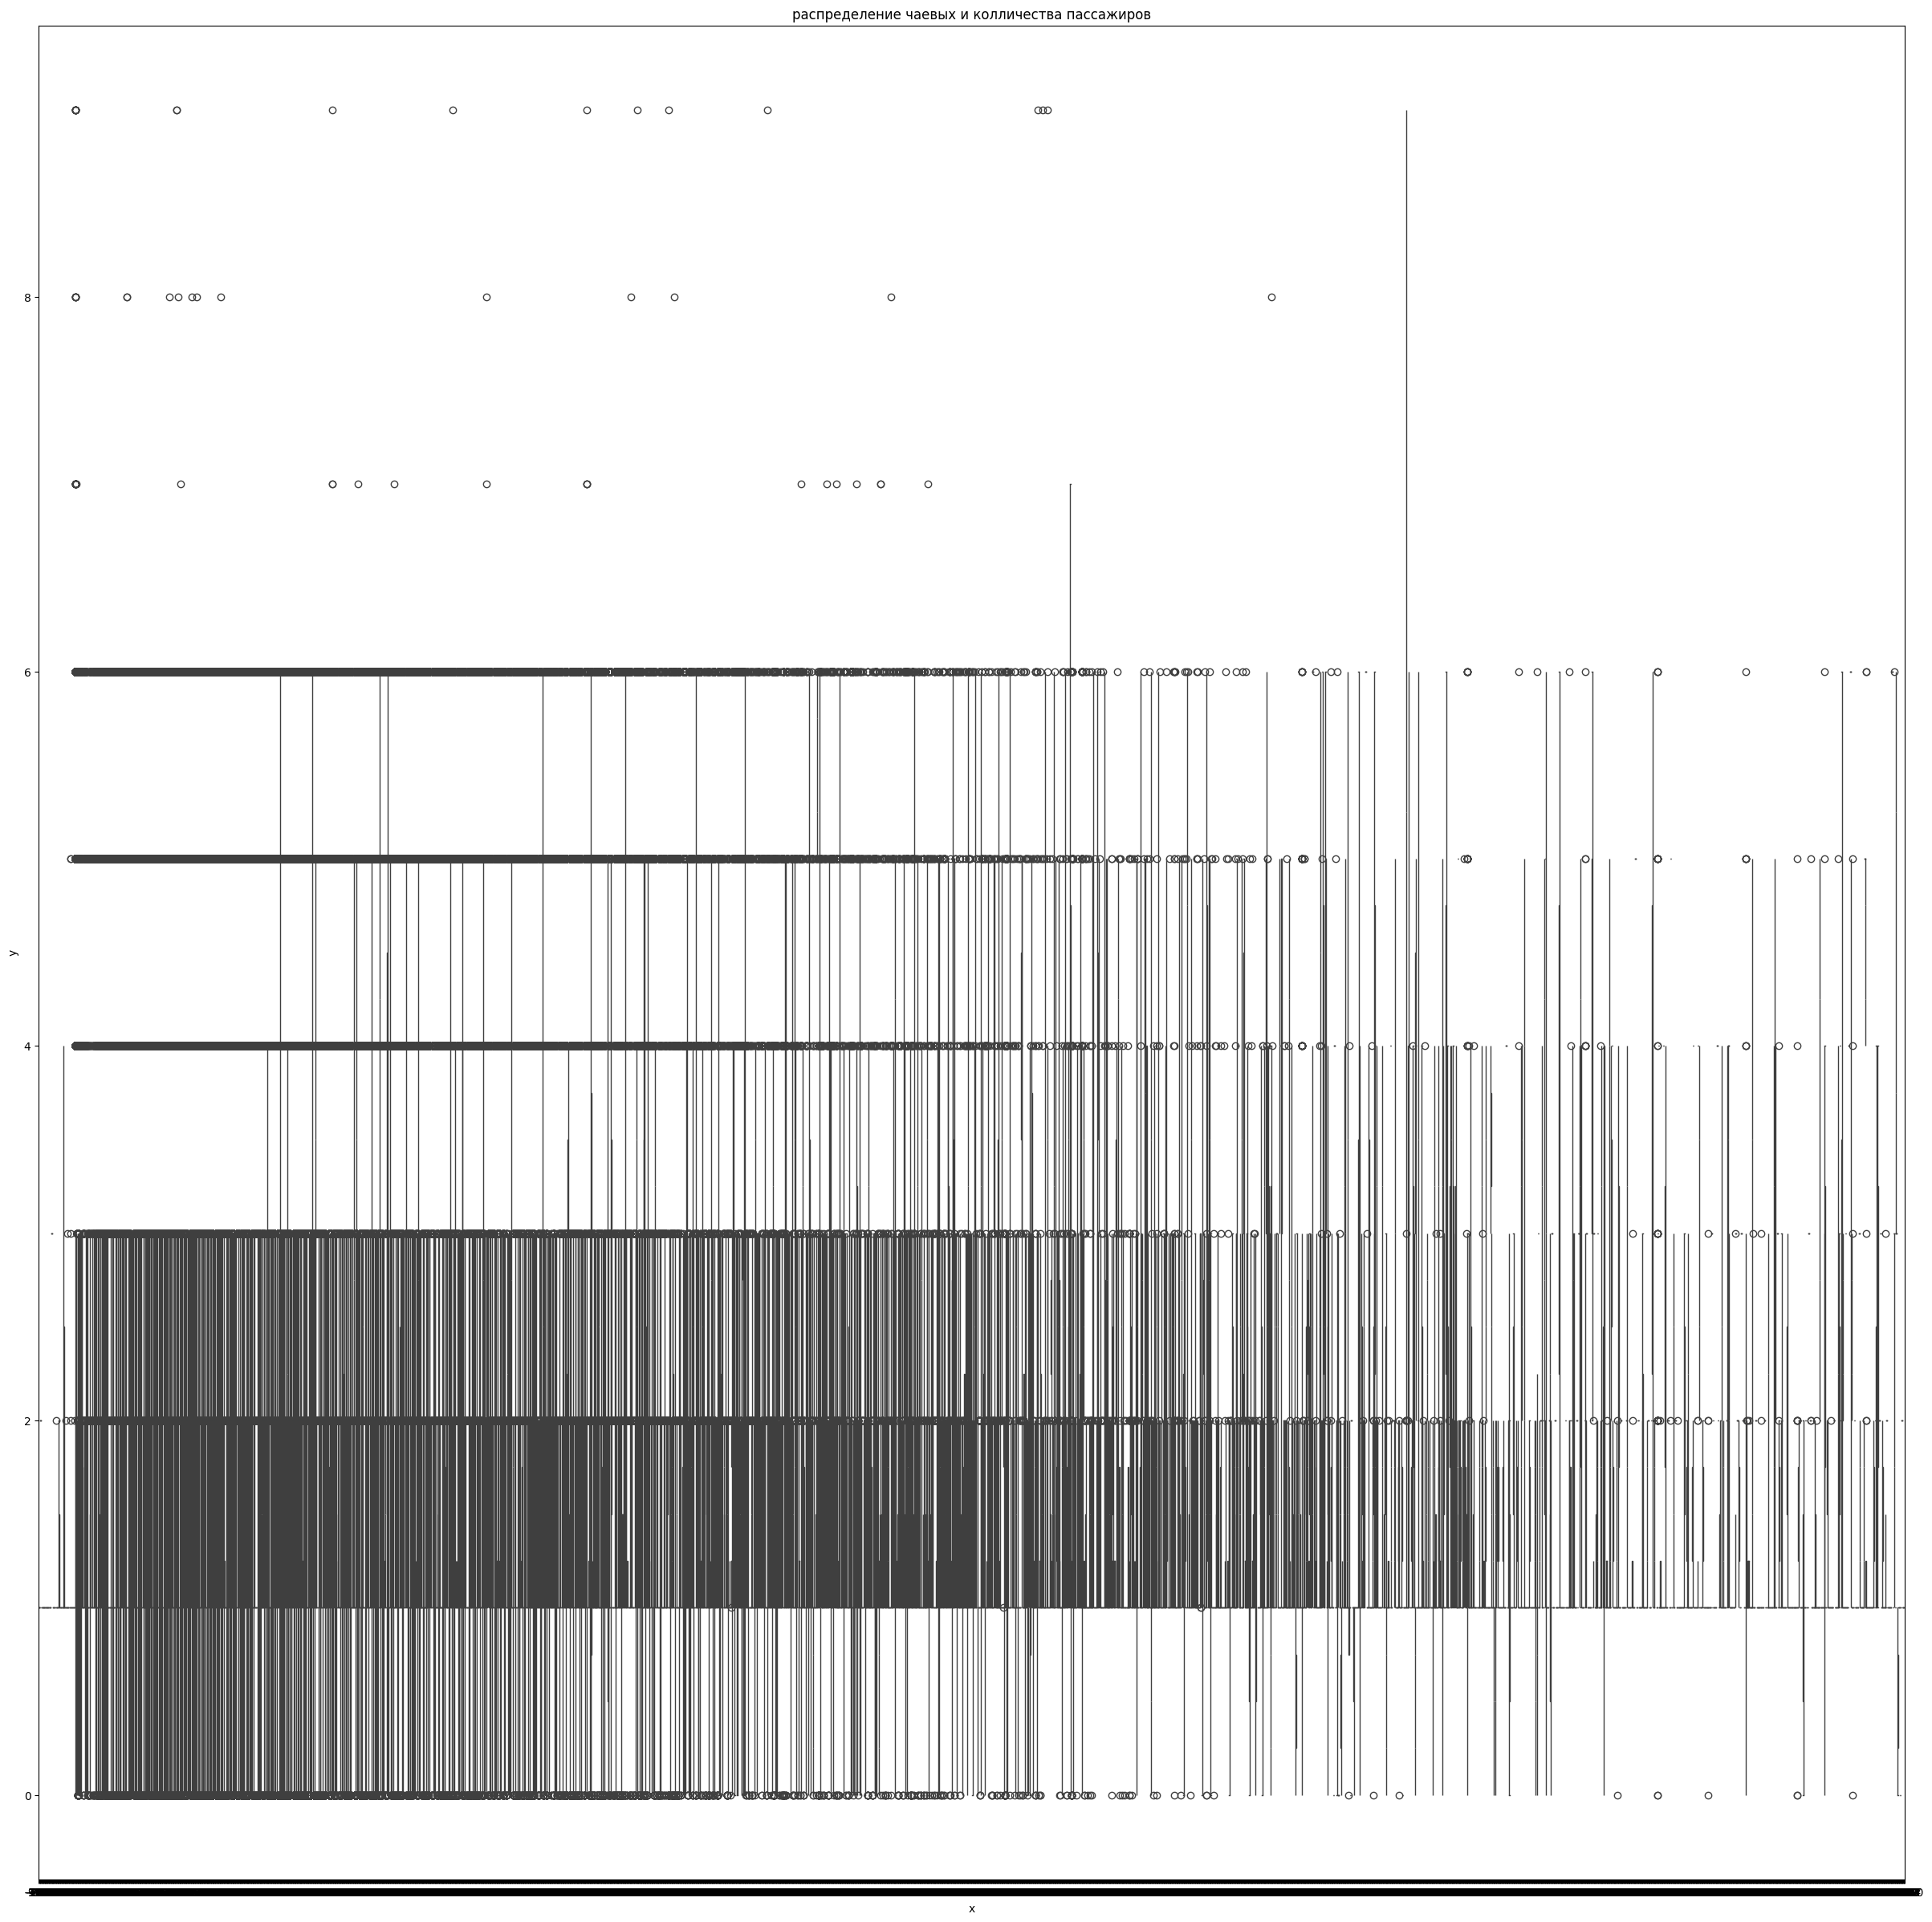

In [13]:
f, ax = plt.subplots(figsize=(30, 30))
sns.boxplot(data=df, x=df.tip_amount, y=df.passenger_count)
ax.set_title("распределение чаевых и колличества пассажиров")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [15]:
df[df.tip_amount<0].head()

,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pulocation_id,dolocation_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date
17630,2.0,2020-01-01 01:08:14,2020-01-01 01:10:14,2.0,0.24,1.0,N,42,42,4.0,-3.5,-0.5,-0.5,-0.80,0.0,-0.3,-5.60,0.0,2020-01-01
82398,2.0,2020-01-01 12:49:36,2020-01-01 12:49:59,1.0,0.00,1.0,N,193,193,3.0,-2.5,0.0,-0.5,-0.66,0.0,-0.3,-3.96,0.0,2020-01-01
139505,2.0,2020-01-01 18:51:47,2020-01-01 18:52:04,1.0,0.00,1.0,N,264,264,3.0,-2.5,-1.0,-0.5,-0.86,0.0,-0.3,-5.16,0.0,2020-01-01
139507,2.0,2020-01-01 18:54:09,2020-01-01 18:54:20,1.0,0.00,1.0,N,264,264,3.0,-2.5,-1.0,-0.5,-0.08,0.0,-0.3,-4.38,0.0,2020-01-01
191332,2.0,2020-01-02 08:23:29,2020-01-02 08:32:22,1.0,1.73,1.0,N,138,138,3.0,-8.0,0.0,-0.5,-7.00,0.0,-0.3,-15.80,0.0,2020-01-02


In [16]:
df_2 = df[(df.tip_amount>1) & (df.tip_amount<200) & (df.tip_amount<200) ]

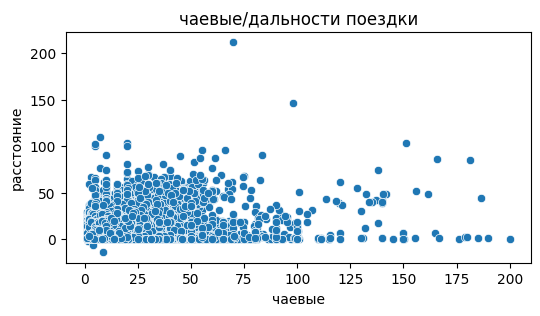

In [17]:
f, ax = plt.subplots(figsize=(6, 3))
sns.scatterplot(x="tip_amount", y="trip_distance", data=df_2)
ax.set(xlabel='чаевые', ylabel='расстояние')
plt.title("чаевые/дальности поездки")
plt.show()

## Чаевые

In [18]:
df.size

121695133

In [19]:
df[df.tip_amount>0].size

86533277

In [20]:
81_978_894/115_290_144

0.7110659346561315

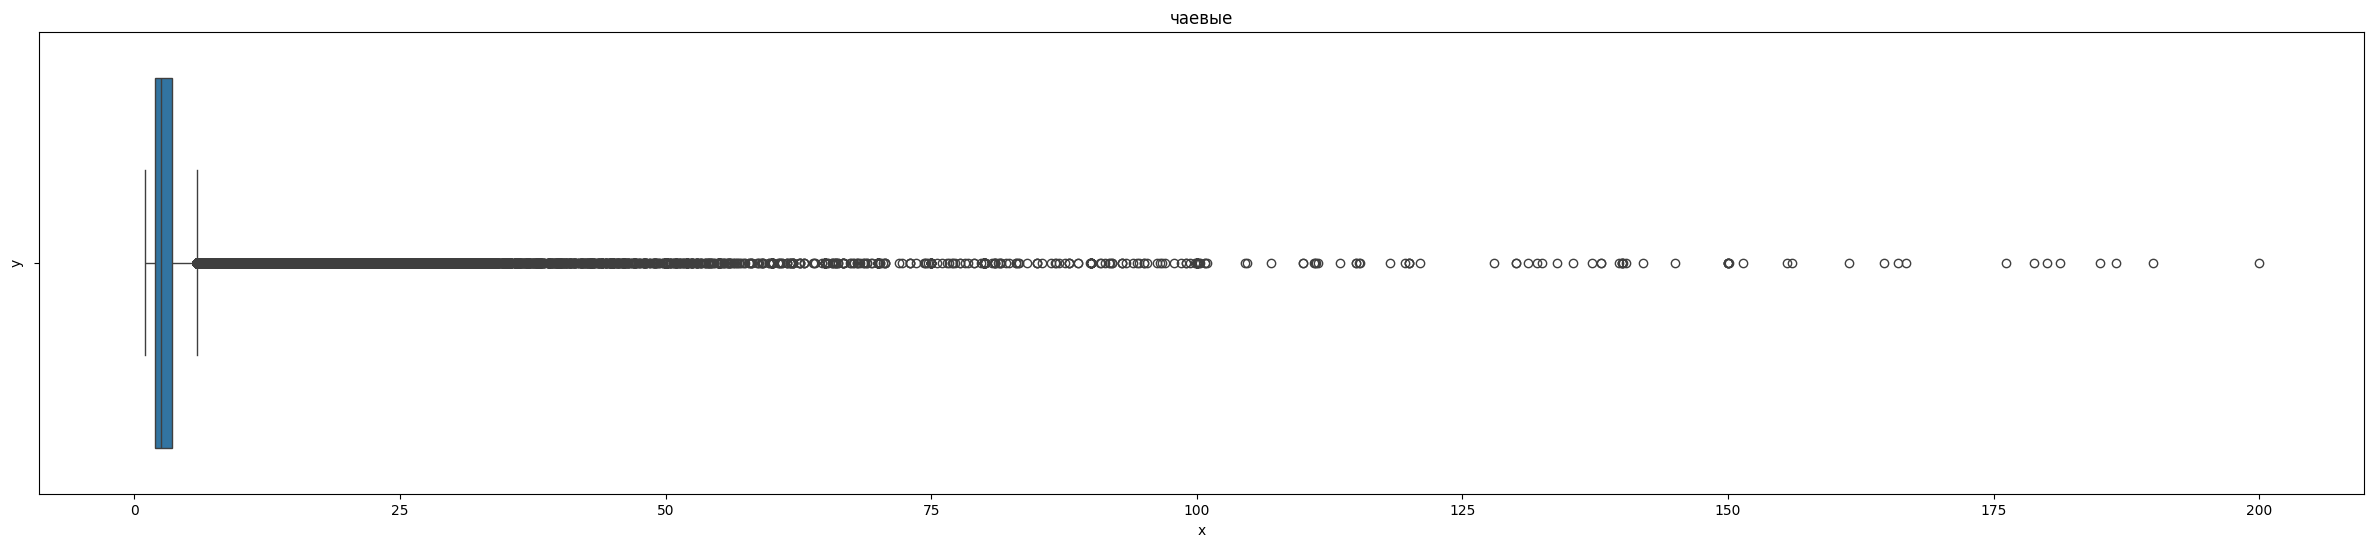

In [21]:
f, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(x=df_2.tip_amount)
ax.set_title("чаевые")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

для наглядности отсеку еще значения выбросов

In [22]:
df_3 = df[(df.tip_amount<18) & (df.tip_amount>=0) ]

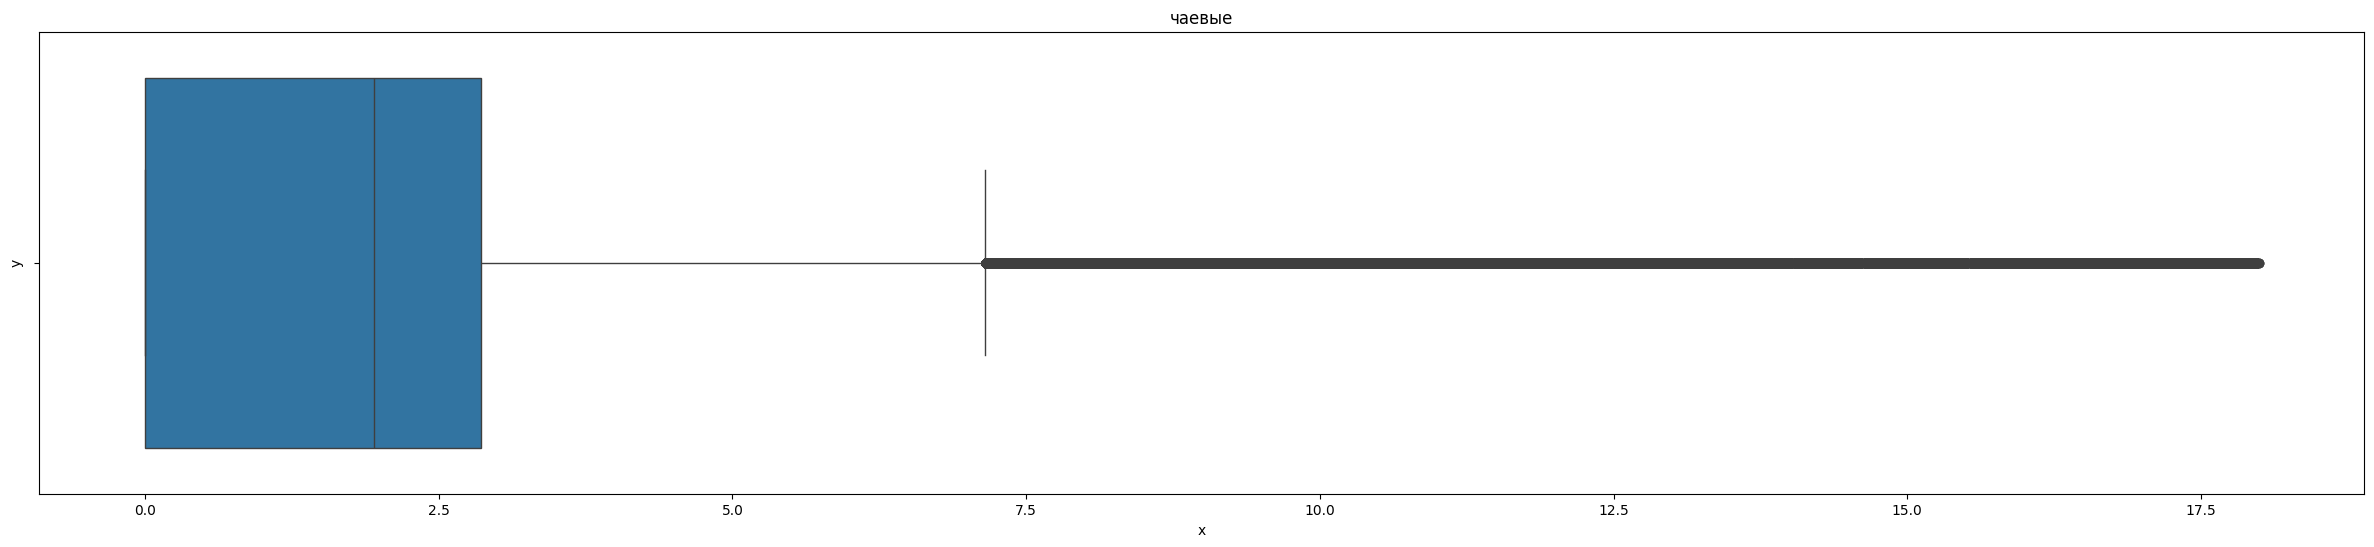

In [23]:
f, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(x=df_3.tip_amount)
ax.set_title("чаевые")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

сводные статистики по столбцу

In [24]:
df.tip_amount.describe()


count    6.405007e+06
mean     2.189342e+00
std      2.760028e+00
min     -9.100000e+01
25%      0.000000e+00
50%      1.950000e+00
75%      2.860000e+00
max      1.100000e+03
Name: tip_amount, dtype: float64

In [25]:
df_3 = df_3[(df_3.trip_distance<80) & (df_3.trip_distance>0) ]

## Дальность поездки

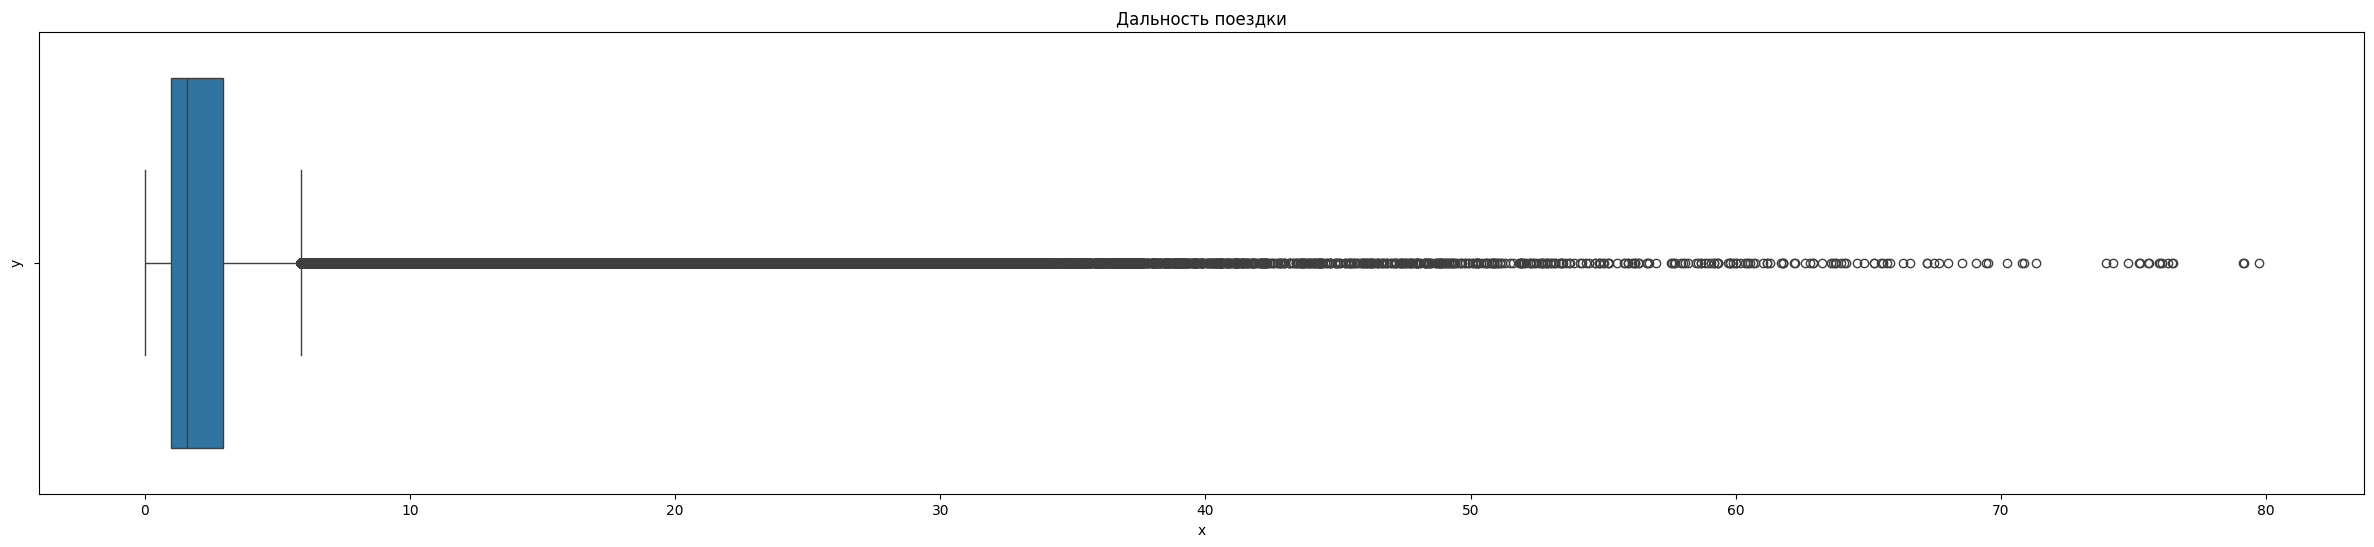

In [26]:
f, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(x=df_3.trip_distance)
ax.set_title("Дальность поездки")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [27]:
df.trip_distance.describe()

count    6.405007e+06
mean     2.896820e+00
std      3.826030e+00
min     -3.062000e+01
25%      9.600000e-01
50%      1.600000e+00
75%      2.930000e+00
max      2.628800e+02
Name: trip_distance, dtype: float64

In [28]:
df_3[df_3.trip_distance>10].size

6761112

In [29]:
(6405264/115_290_144)*100

5.5557776040248505

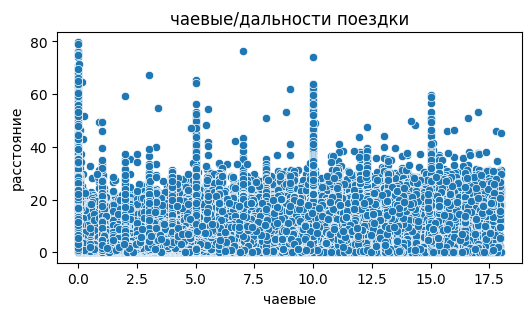

In [30]:
f, ax = plt.subplots(figsize=(6, 3))
sns.scatterplot(x="tip_amount", y="trip_distance", data=df_3)
ax.set(xlabel='чаевые', ylabel='расстояние')
plt.title("чаевые/дальности поездки")
plt.show()

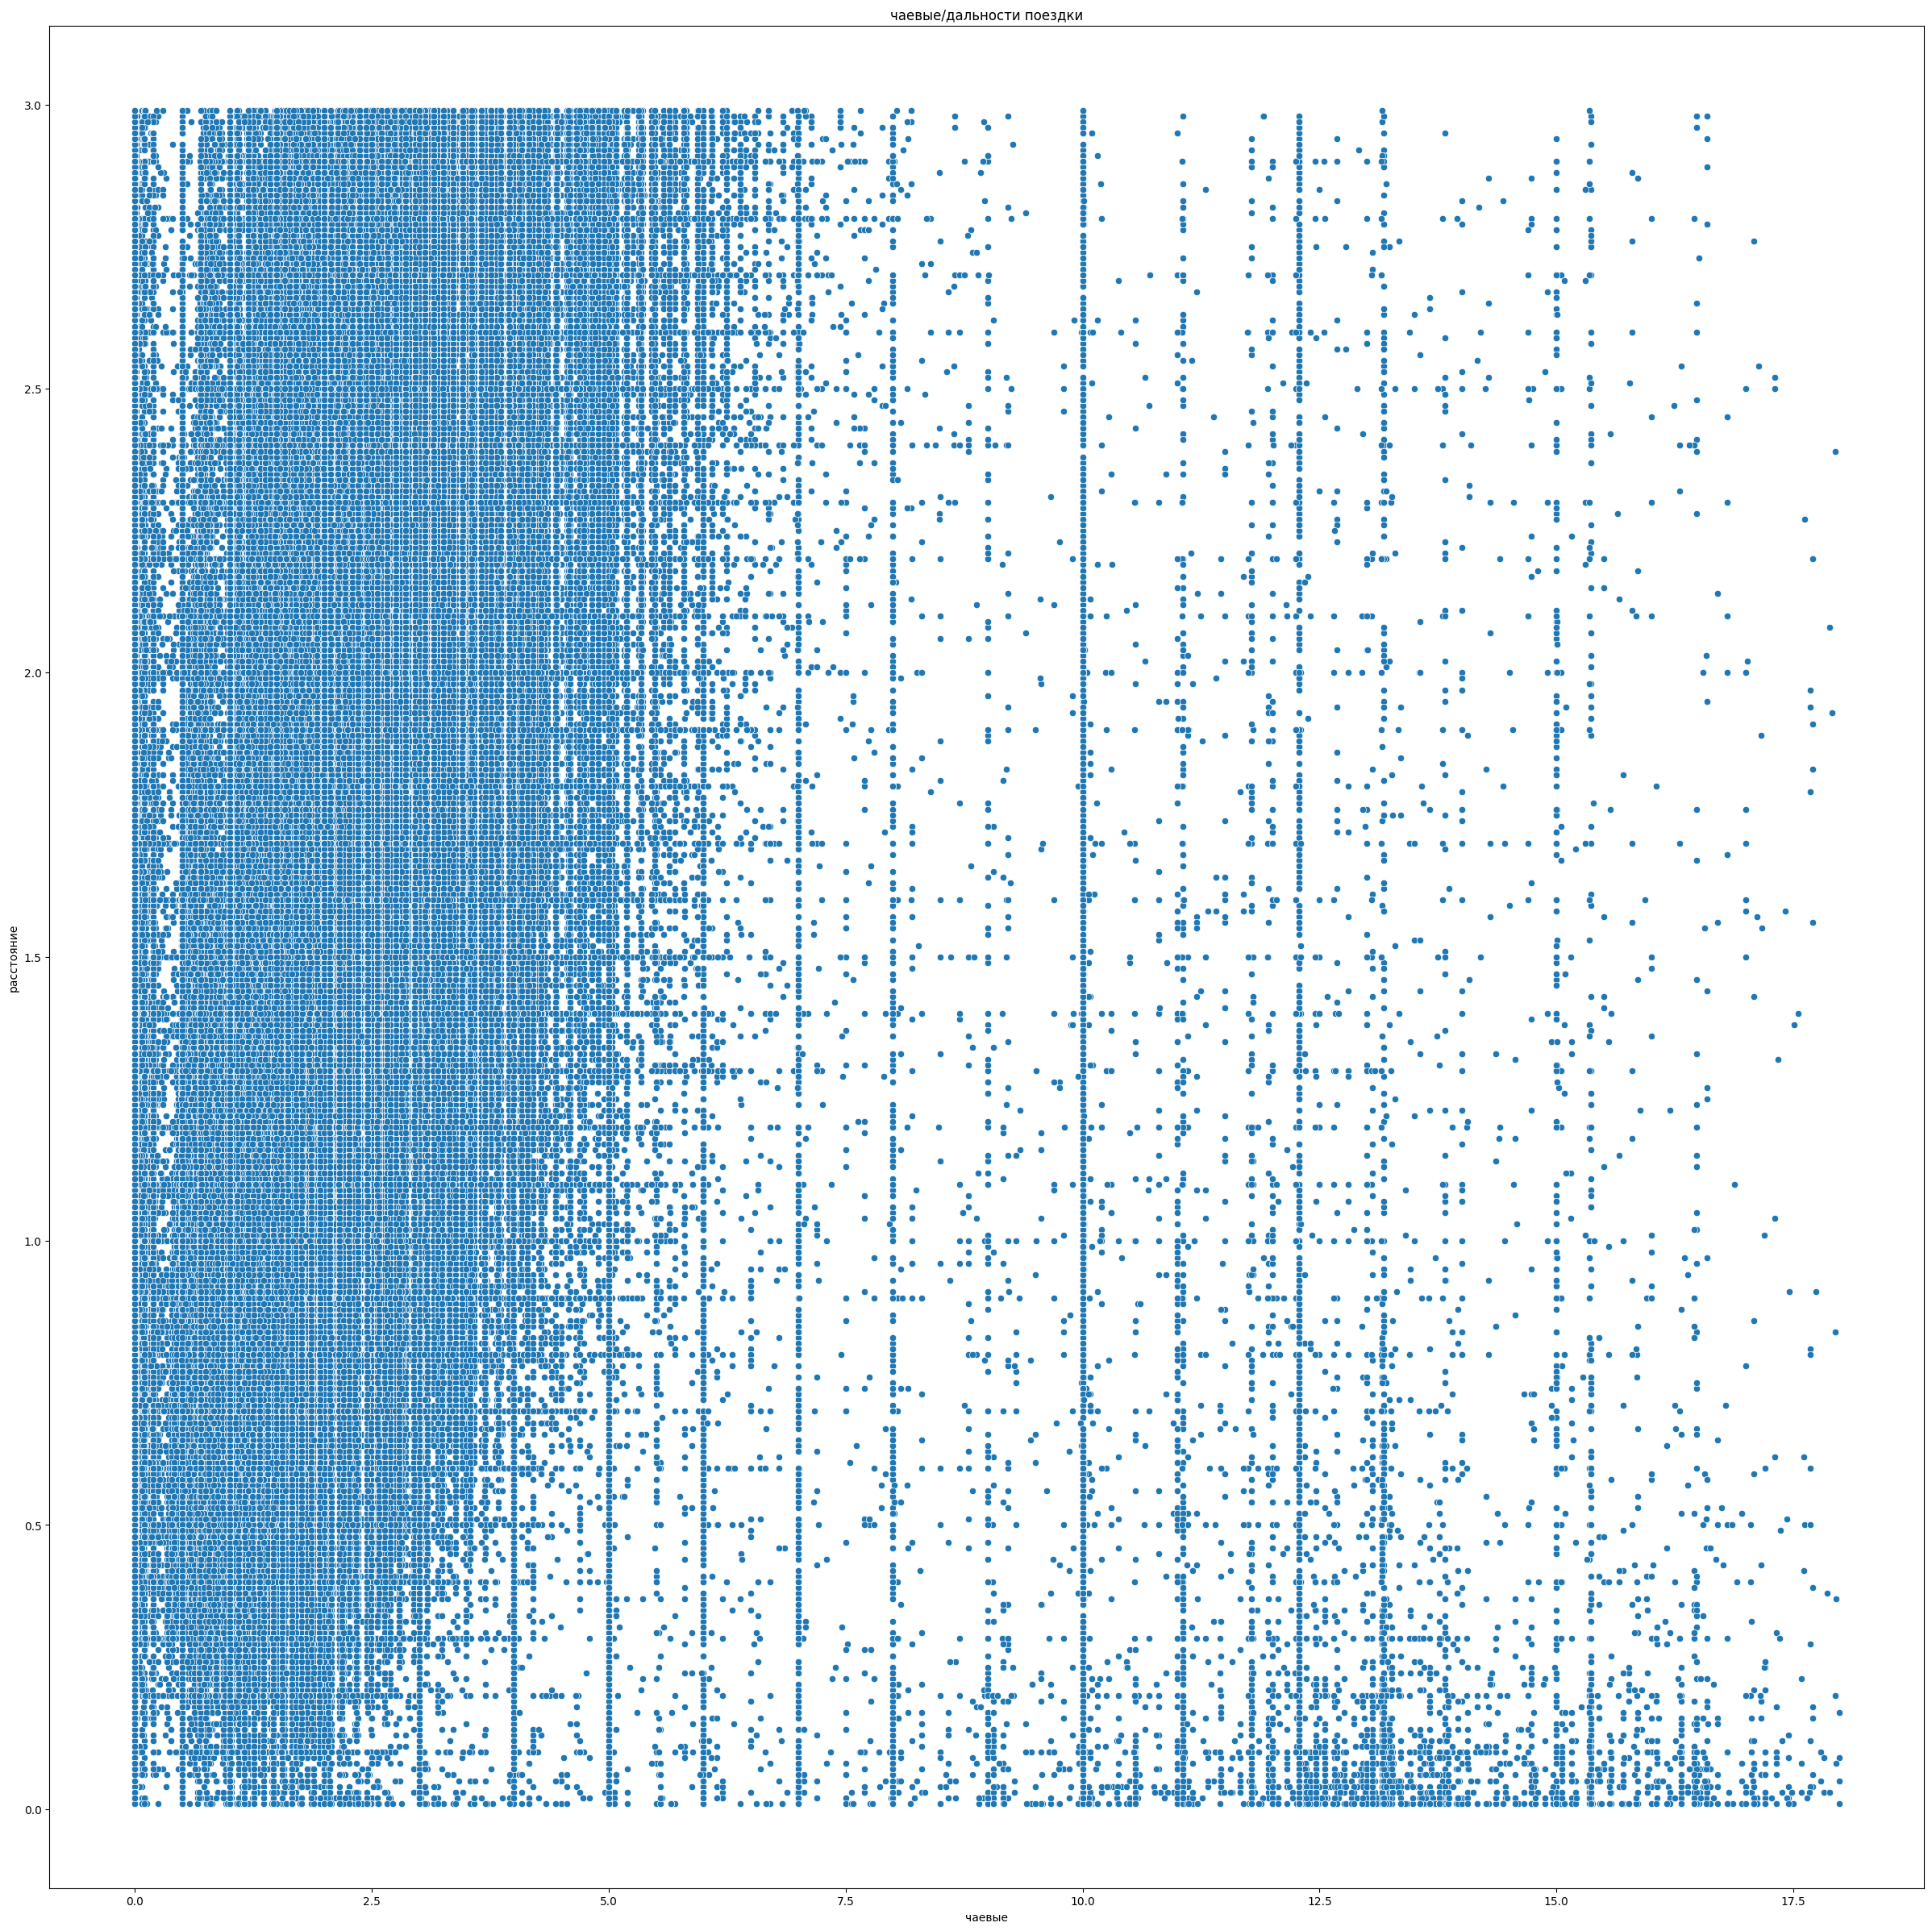

In [31]:
f, ax = plt.subplots(figsize=(30, 30))
sns.scatterplot(x="tip_amount", y="trip_distance", data=df_3[df_3.trip_distance<3])
ax.set(xlabel='чаевые', ylabel='расстояние')
plt.title("чаевые/дальности поездки")
plt.show()

In [32]:
df_3 = df_3[df_3.trip_distance<3]

## Анализ столбца данных кол-во пассажиров

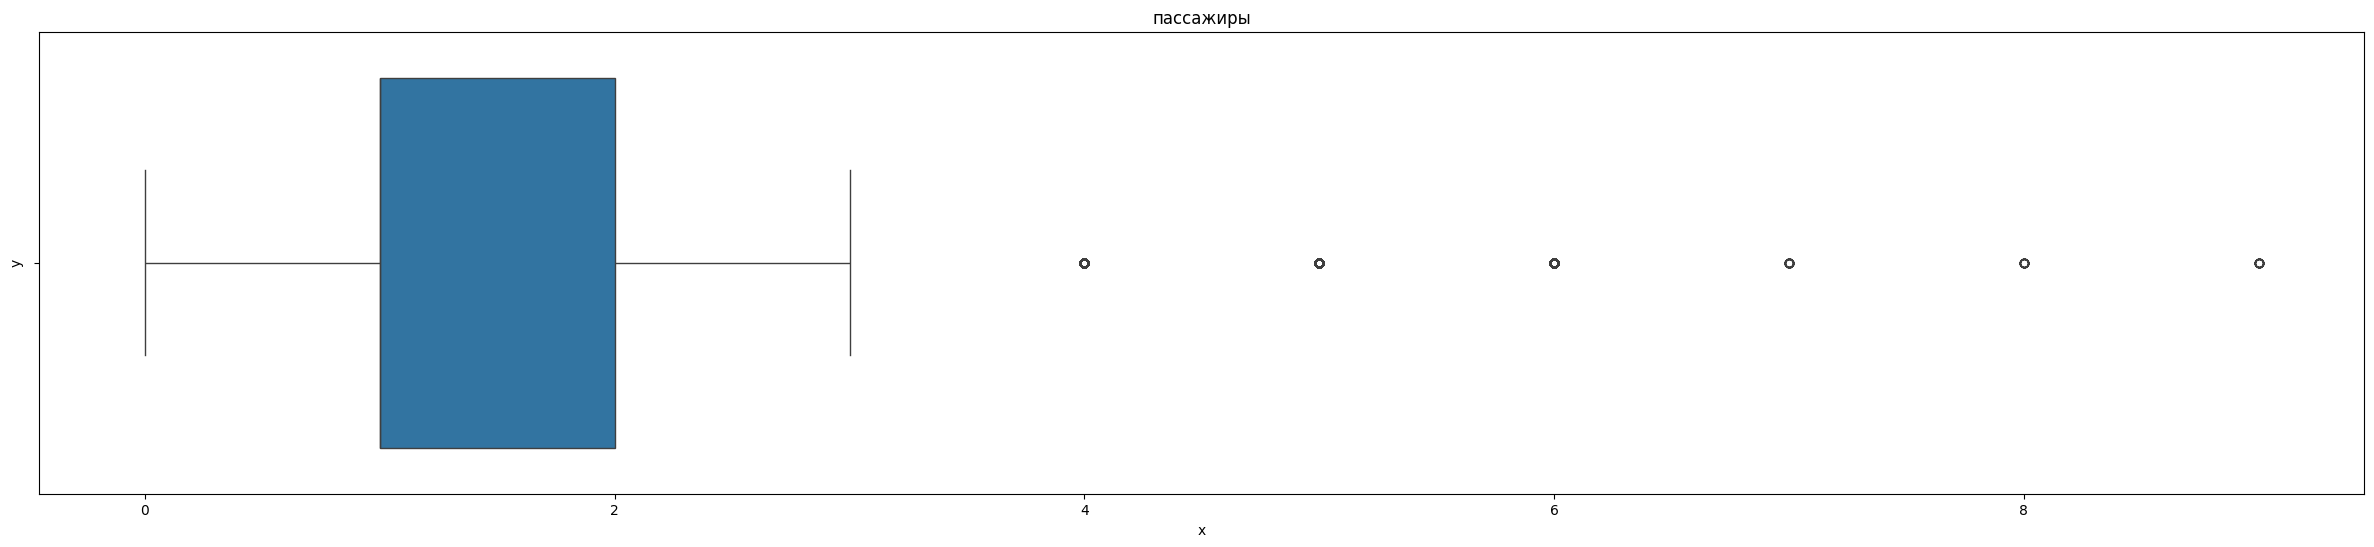

In [34]:
f, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(x=df.passenger_count)
ax.set_title("пассажиры")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [35]:
df.passenger_count.describe()

count    6.339567e+06
mean     1.515333e+00
std      1.151594e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

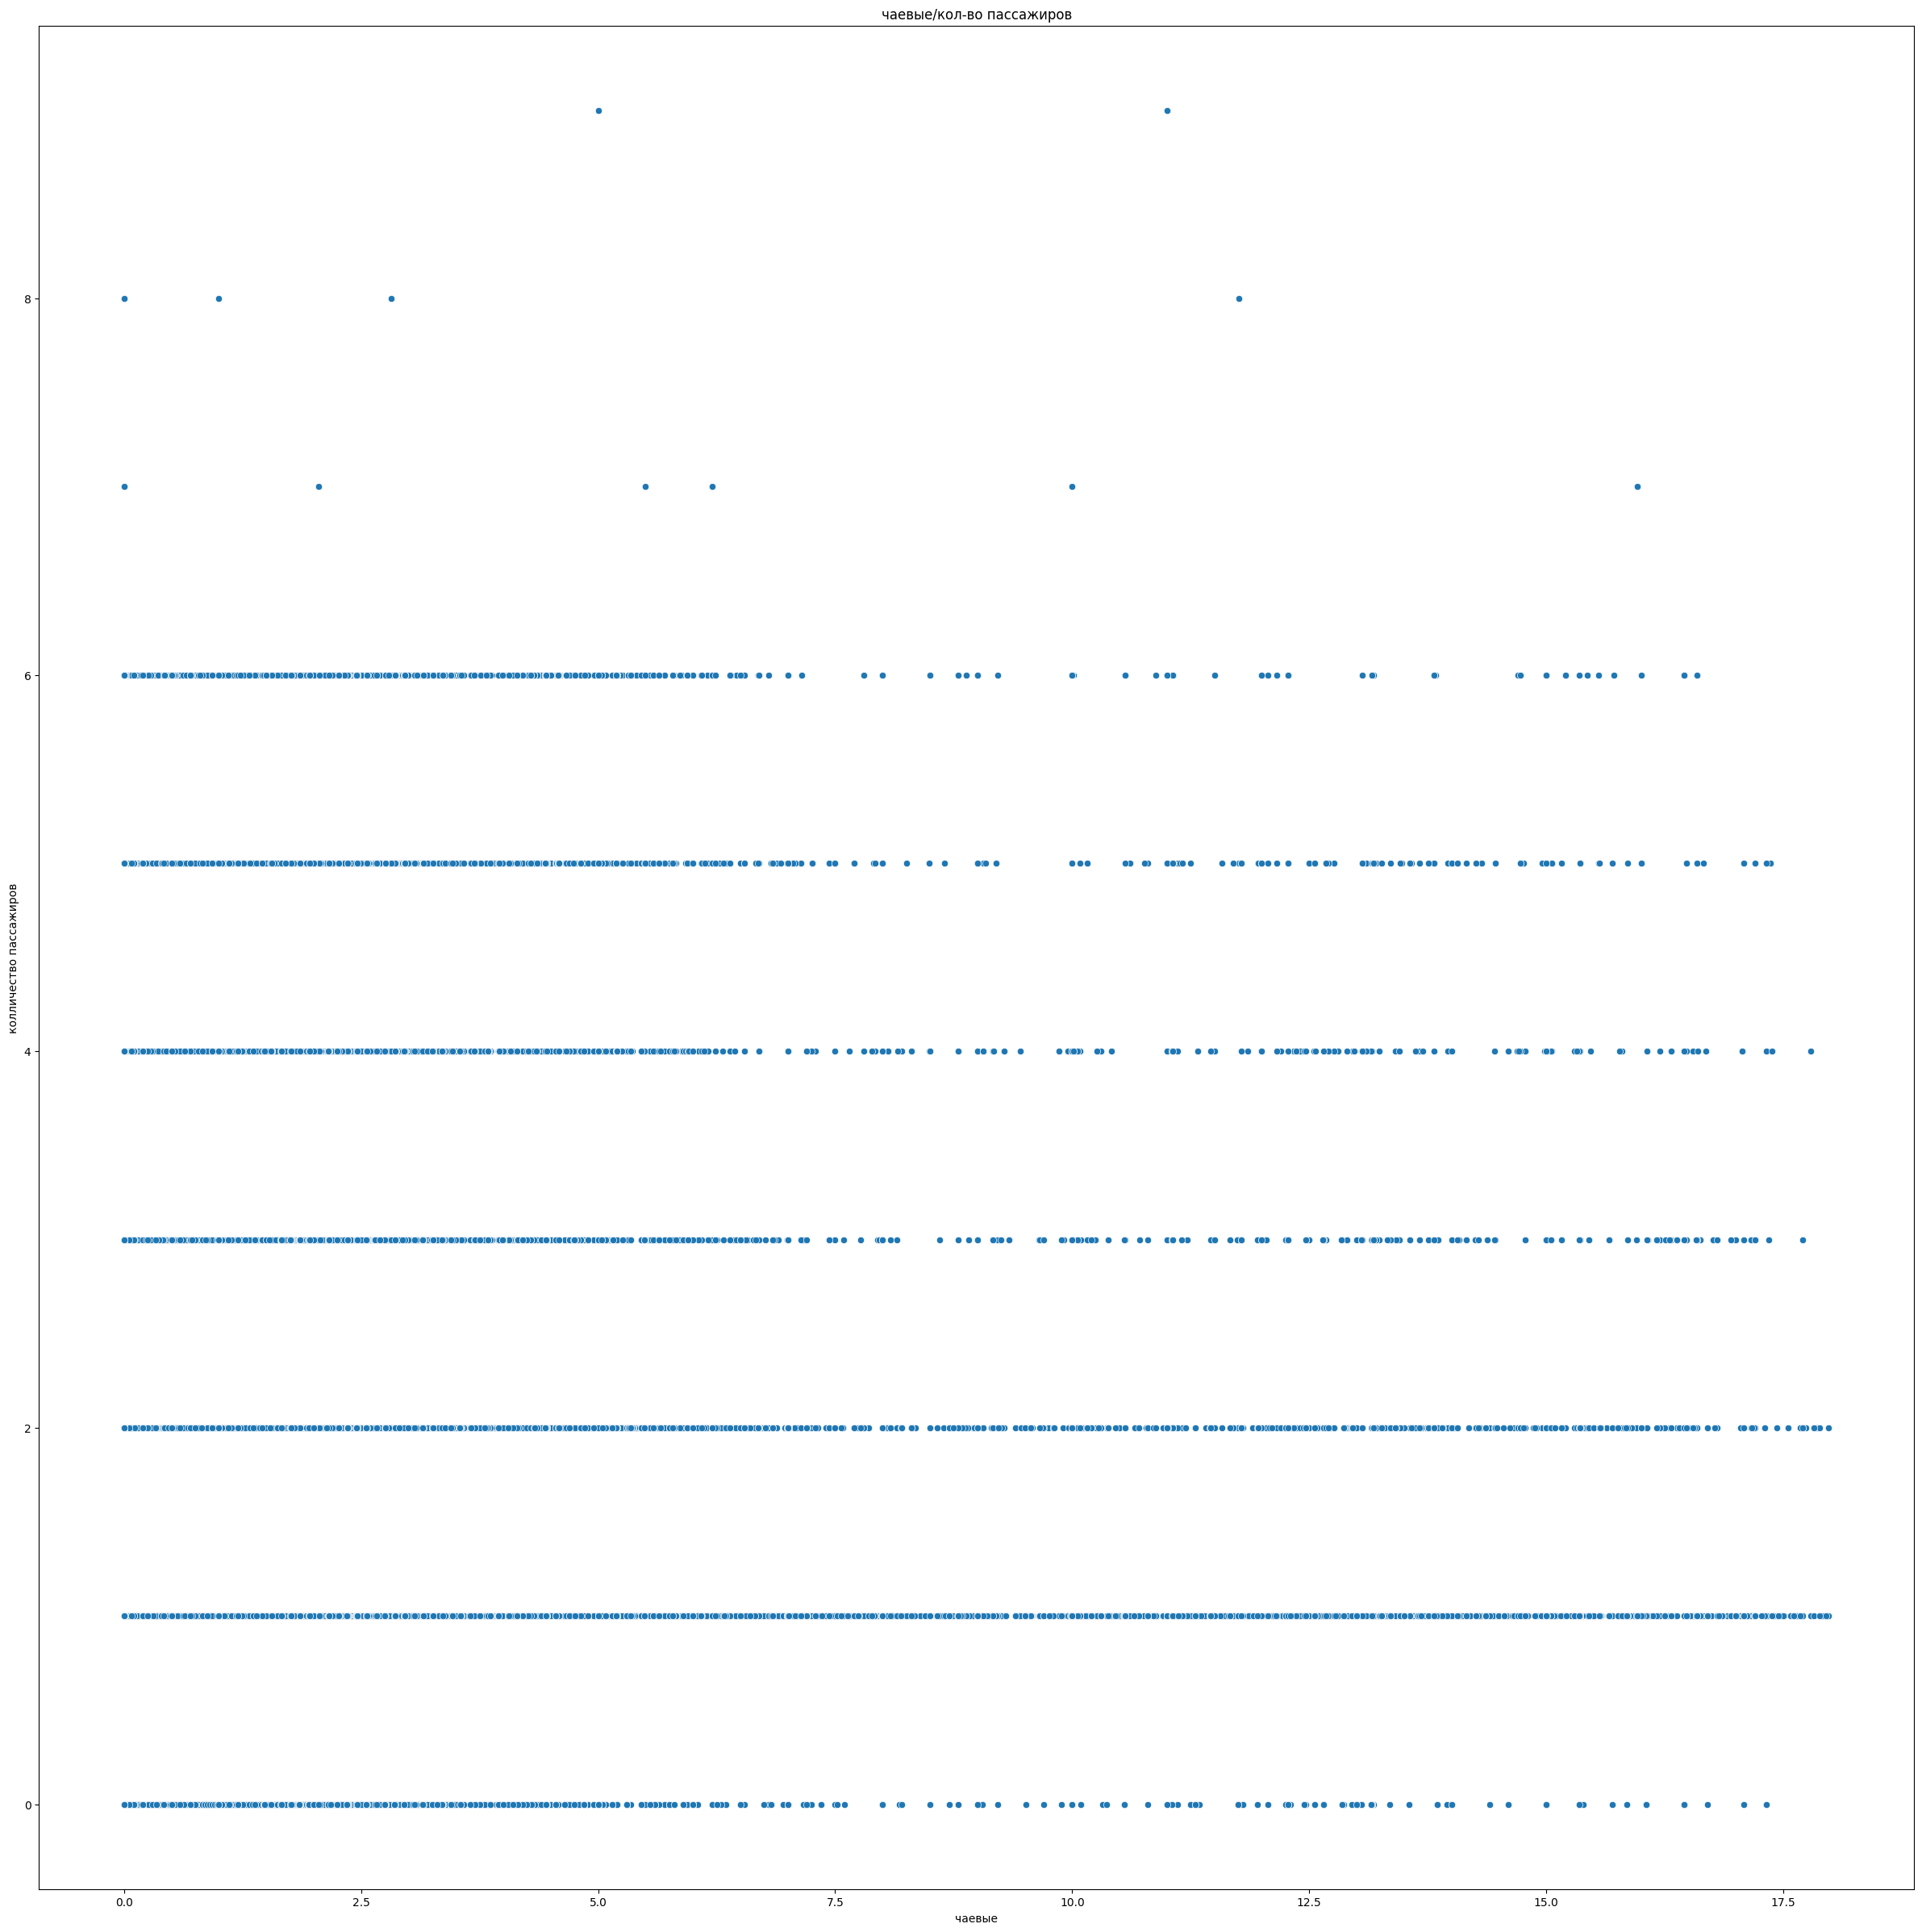

In [36]:
f, ax = plt.subplots(figsize=(30, 30))
sns.scatterplot(x="tip_amount", y="passenger_count", data=df_3)
ax.set(xlabel='чаевые', ylabel='колличество пассажиров')
plt.title("чаевые/кол-во пассажиров")
plt.show()

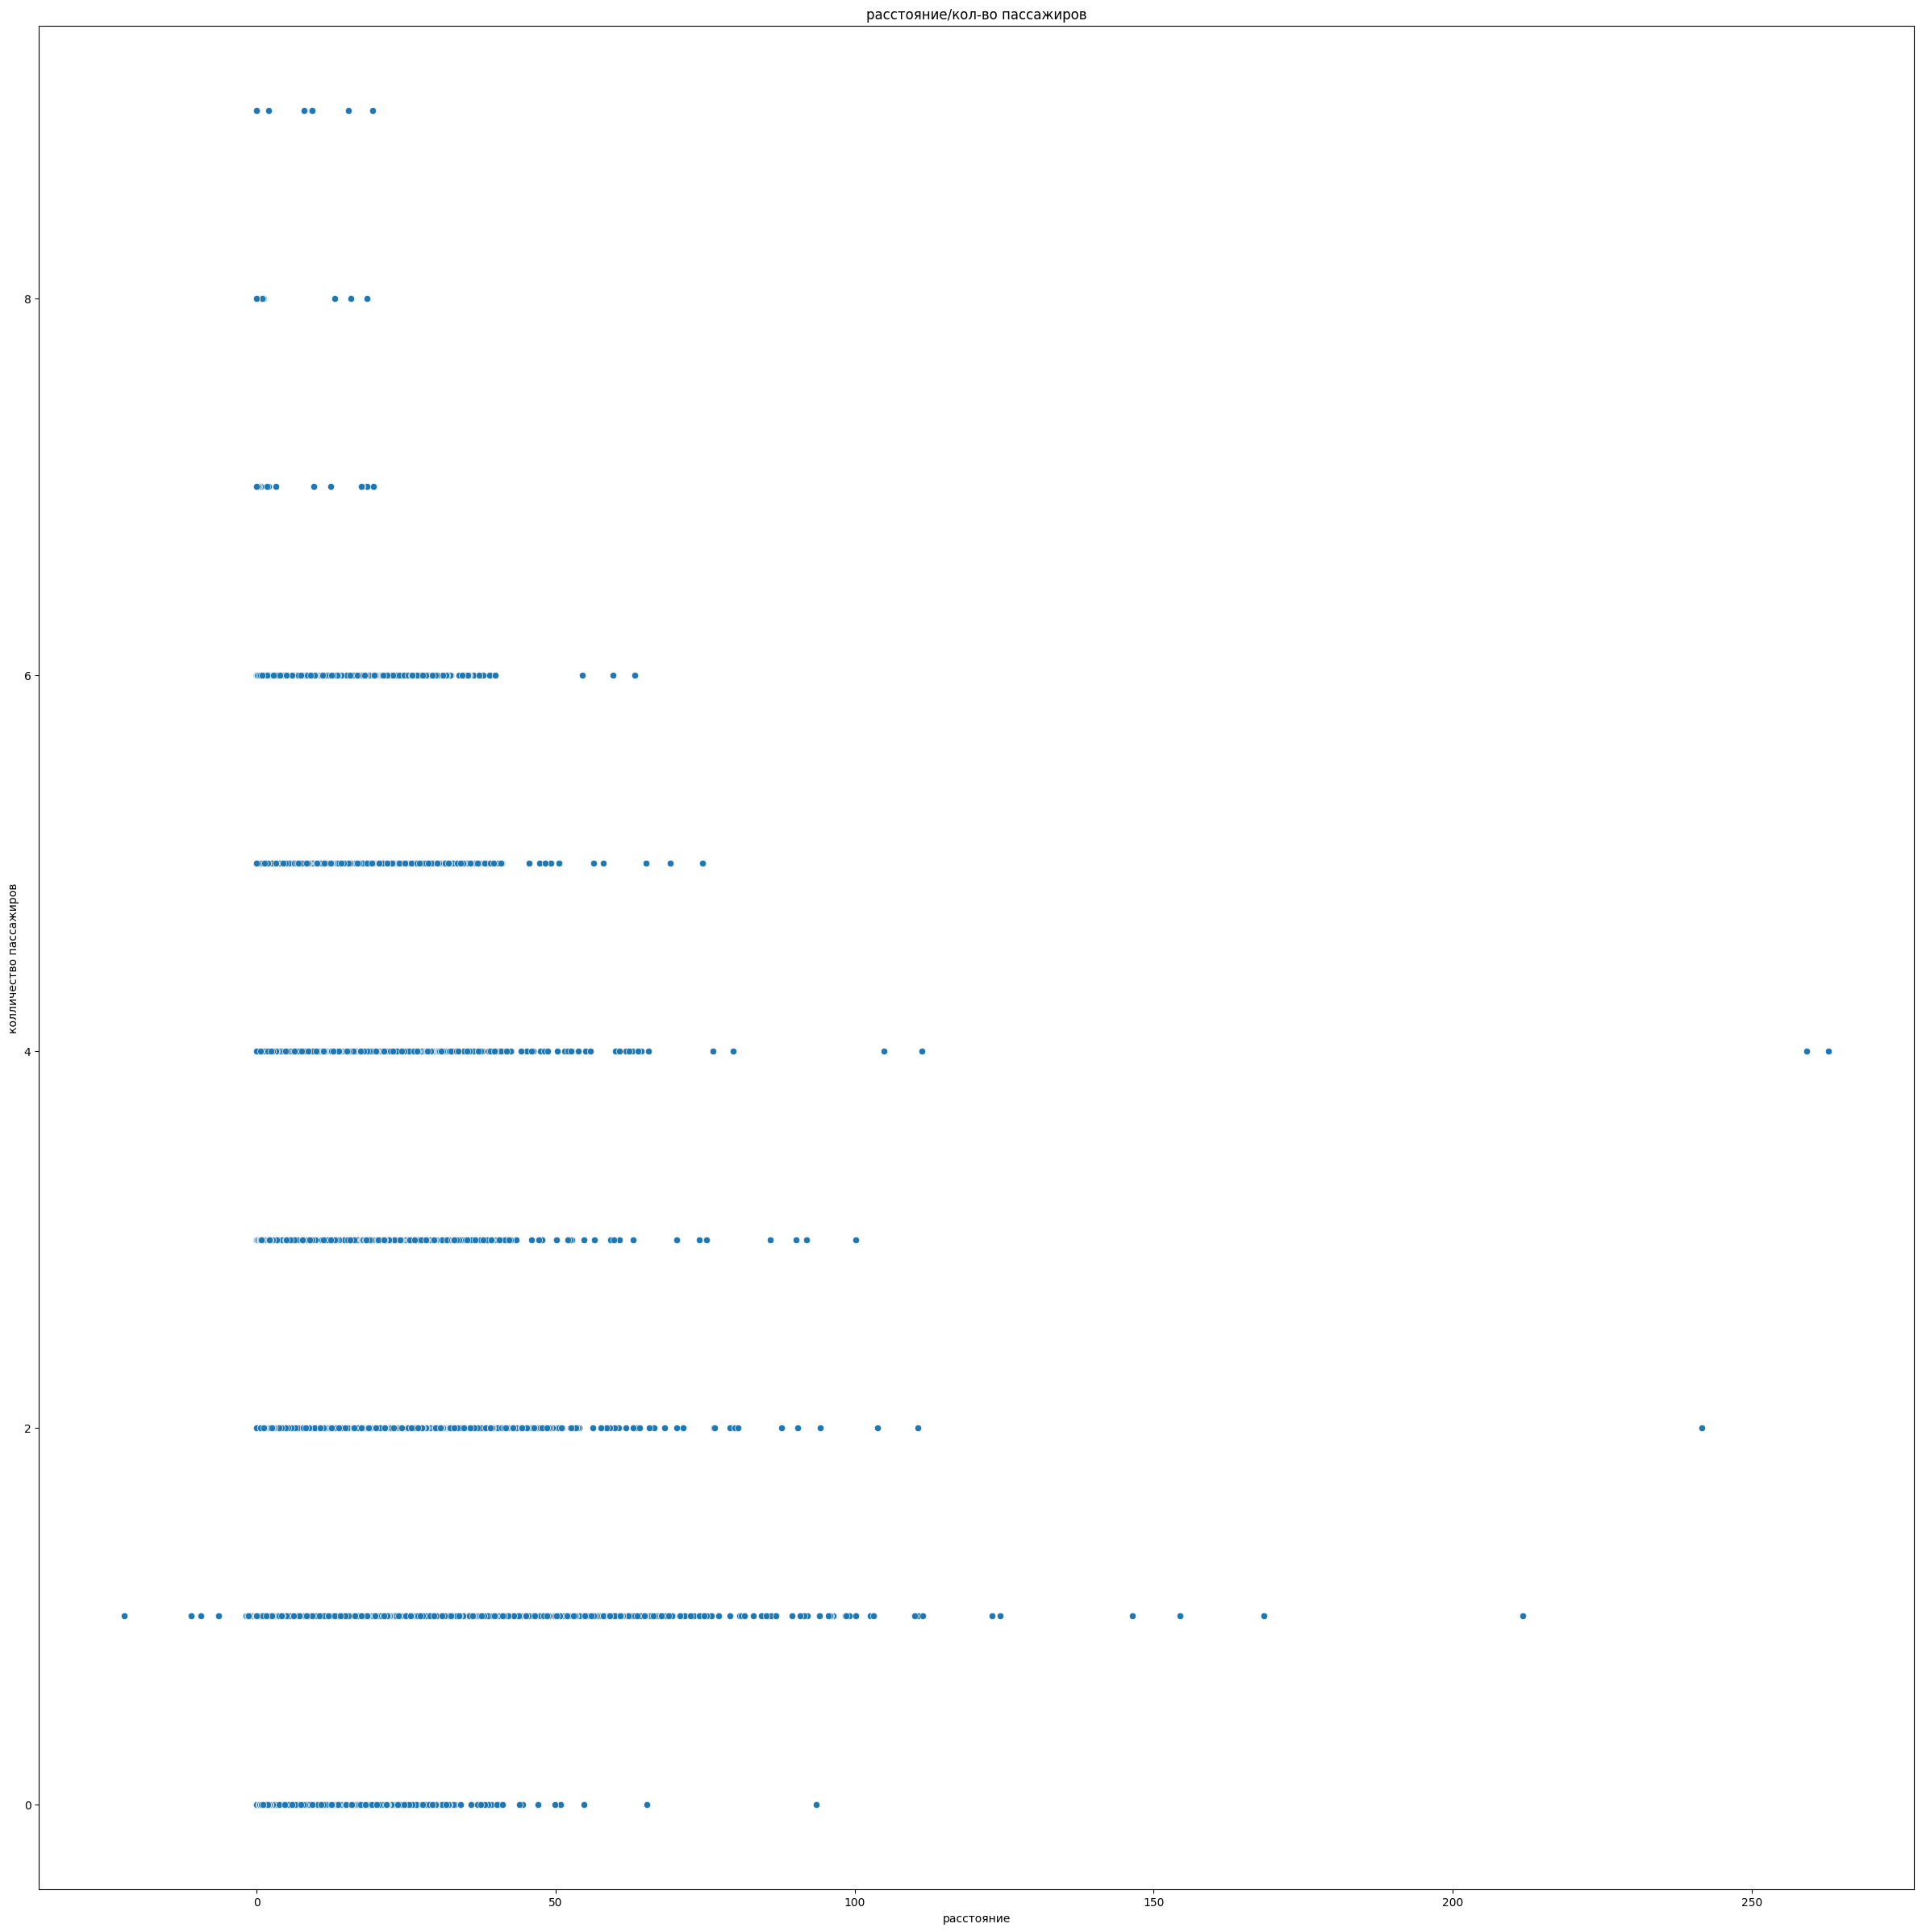

In [77]:
f, ax = plt.subplots(figsize=(30, 30))
sns.scatterplot(x="trip_distance", y="passenger_count", data=df)
ax.set(xlabel='расстояние', ylabel='колличество пассажиров')
plt.title("расстояние/кол-во пассажиров")
plt.show()

# Вывод

## Храктеристика данных чаевые
Из всех поездок 115_290_144 оставили чаевые в 81_978_894 поездках. Т.е в 70% случаев поездка совершается с чаевыми
Если за поездку водитель получил 7 и более долларов, то это можно считать везением. 
В среднем водители получают 2 доллара чаевых

## Характеристика данных расстояние
В среднем поезди осуществляются на расстояние 2.9 мили. поездки свыше 10 миль совершаются лишь в 5% случаев

## Характеристика данных расстояние/чаевые
В графике чаевые/дальности поездки видны часто встречающиеся значения чаевых это: 0, 5, 10, 15 долларов, что говорит что людям проще отдавать купюры кратные 5.
Если поестка более 22 миль, то шанс получить чаевые приближается к нулю (но возможно из-за того что поездок на такое расстояние мало, то и чаевые не заметны). 
На графике видно четкое увеличение чаевых, от расстояния
## Характеристика данных колличество пассажиров
В основном поездки происхдят с 1 или 2 пассажирами
## Характеристика данных расстояние/колличество пассажиров
Чем больше компания, тем короче переезд. На большие расстояния пассажиры предпочитают отправляться в одиночку
## Характеристика данных чаевые/колличество пассажиров
Появилось предположение что чем больше пассажиров, тем менее вероятны высокие суммы чаевых


## Появившиеся вопросы
Отрицательные чаевые
Отрицательные расстояния